In [0]:
from IPython.display import display,Image

In [0]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=7f873d83ed37e50617179747a1cc50d37cef9c99ce37b148ce90a12948d37b7e
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
import mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge  #릿지 회귀
import pandas as pd

In [0]:
boston=load_boston()

In [0]:
df_boston=pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [0]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [0]:
df_boston.loc[:,'CRIM':"RM"]

,CRIM,ZN,INDUS,CHAS,NOX,RM
0,0.00632,18.0,2.31,0.0,0.538,6.575
1,0.02731,0.0,7.07,0.0,0.469,6.421
2,0.02729,0.0,7.07,0.0,0.469,7.185
3,0.03237,0.0,2.18,0.0,0.458,6.998
4,0.06905,0.0,2.18,0.0,0.458,7.147
5,0.02985,0.0,2.18,0.0,0.458,6.430
6,0.08829,12.5,7.87,0.0,0.524,6.012
7,0.14455,12.5,7.87,0.0,0.524,6.172
8,0.21124,12.5,7.87,0.0,0.524,5.631
9,0.17004,12.5,7.87,0.0,0.524,6.004


In [0]:
x=df_boston.loc[:,"CRIM":"LSTAT"]
y=boston.target

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
model=LinearRegression().fit(x_train,y_train)

In [0]:
pred=model.predict(x_test)
pred

array([28.83885359, 36.00783288, 15.08324755, 25.23090886, 18.87864064,
       23.21398327, 17.5931124 , 14.30508093, 23.05438985, 20.62008346,
       24.78514683, 18.66833668, -6.9788951 , 21.83575737, 19.20898992,
       26.2868054 , 20.54379176,  5.65713224, 40.42358065, 17.64146116,
       27.32258958, 30.05056174, 11.15013704, 24.11530393, 17.89145648,
       15.79348591, 22.94743453, 14.2586068 , 22.26731194, 19.24709013,
       22.26897546, 25.24344002, 25.69165643, 17.98759507, 16.70286649,
       17.11631225, 31.19643534, 20.17835831, 23.71828436, 24.79196868,
       13.94575895, 32.00389982, 42.53869791, 17.44523722, 27.15354457,
       17.07482215, 13.89272021, 26.06440323, 20.36888769, 29.97813037,
       21.35346608, 34.32287916, 15.88498671, 26.17757739, 39.50970314,
       22.84123308, 18.95049088, 32.68913818, 25.02057949, 12.90539147,
       22.76052302, 30.53884316, 31.60797905, 15.92162168, 20.50670563,
       16.50798147, 20.50202198, 26.00723901, 30.63860954, 11.42

In [0]:
df=pd.DataFrame({"y_test":y_test,"pred":pred,"diff":(y_test-pred)})
df

,y_test,pred,diff
0,23.6,28.838854,-5.238854
1,32.4,36.007833,-3.607833
2,13.6,15.083248,-1.483248
3,22.8,25.230909,-2.430909
4,16.1,18.878641,-2.778641
5,20.0,23.213983,-3.213983
6,17.8,17.593112,0.206888
7,14.0,14.305081,-0.305081
8,19.6,23.054390,-3.454390
9,16.8,20.620083,-3.820083


In [0]:
acc_tr=model.score(x_train,y_train)
acc_test=model.score(x_test,y_test)

print("train_R_Square={a}, test_R_Square={b}".format(a=acc_tr,b=acc_test))

train accuracy=0.748087259862344, test accuracy=0.6844267283527068


In [0]:
print("정규화,확장 전 데이터 셋 : ", x.shape, y.shape)
normalize_X = MinMaxScaler().fit_transform(x)# 입력 데이터 정규화
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(normalize_X) # 데이터 feature
print("정규화, 추가 생성 : ", ex_X.shape, y.shape)

정규화,확장 전 데이터 셋 :  (506, 13) (506,)
정규화, 추가 생성 :  (506, 104) (506,)


In [0]:
x_train,x_test,y_train,y_test=train_test_split(ex_X,y,random_state=42)
model=LinearRegression().fit(x_train,y_train)



acc_tr=model.score(x_train,y_train)
acc_test=model.score(x_test,y_test)




print("train_R_Square={a}, test_R_Square={b}".format(a=acc_tr,b=acc_test))

train accuracy=0.9448313975211592, test accuracy=0.7758378393351728


In [0]:
print("정규화 확장 전 : train_R_Square=0.748087259862344, test_R_Square=0.6844267283527068")
print("정규화 확장 후 : train_R_Square=0.9448313975211592, test_R_Square=0.7758378393351728")

정규화 확장 전 : train_R_Square=0.748087259862344, test_R_Square=0.6844267283527068
정규화 확장 후 : train_R_Square=0.9448313975211592, test_R_Square=0.7758378393351728


In [0]:
### 릿지회귀를 하자

### 테스트 세트 점수가 높은 것이 좋고 차이가 적은게 좋다.


# from sklearn.linear_model import Ridge


#alpha=1
ridge1 = Ridge().fit(x_train, y_train)
print(ridge1)
print("훈련 세트 점수 : {:.2f}".format(ridge1.score(x_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge1.score(x_test, y_test)))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
훈련 세트 점수 : 0.87
테스트 세트 점수 : 0.81


In [0]:
#alpha=10
ridge10 = Ridge(alpha=10).fit(x_train, y_train)
print(ridge10)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(x_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(x_test, y_test)))

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.73


In [0]:
#alpha=0.1
ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)
print(ridge01)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(x_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(x_test, y_test)))

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
훈련 세트 점수 : 0.92
테스트 세트 점수 : 0.82


In [0]:
#alpha=0.01
ridge001 = Ridge(alpha=0.01).fit(x_train, y_train)
print(ridge001)
print("훈련 세트 점수 : {:.2f}".format(ridge001.score(x_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge001.score(x_test, y_test)))

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
훈련 세트 점수 : 0.94
테스트 세트 점수 : 0.81


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

x축은 index, y축은 w값


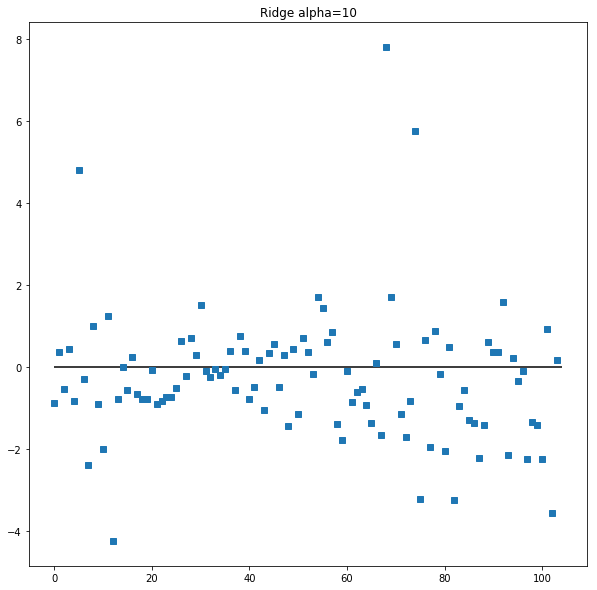

In [0]:
fig = plt.figure(figsize=(10,10))
plt.hlines(0,0, len(ridge10.coef_))
plt.plot(ridge10.coef_, 's', label="Ridge alpha=10")
plt.title('Ridge alpha=10')

print("x축은 index, y축은 w값")

Text(0.5, 1.0, 'Ridge alpha=1')

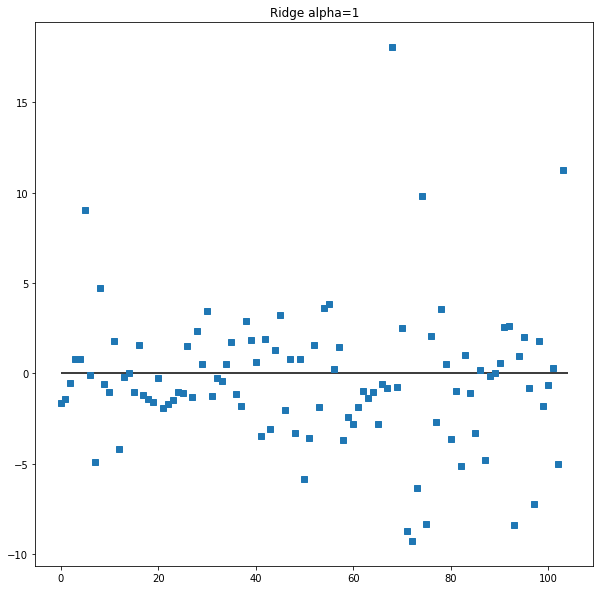

In [0]:
fig = plt.figure(figsize=(10,10))
plt.hlines(0,0, len(ridge1.coef_))
plt.plot(ridge1.coef_, 's', label="Ridge alpha=1")
plt.title('Ridge alpha=1')

Text(0.5, 1.0, 'Ridge alpha=0.1')

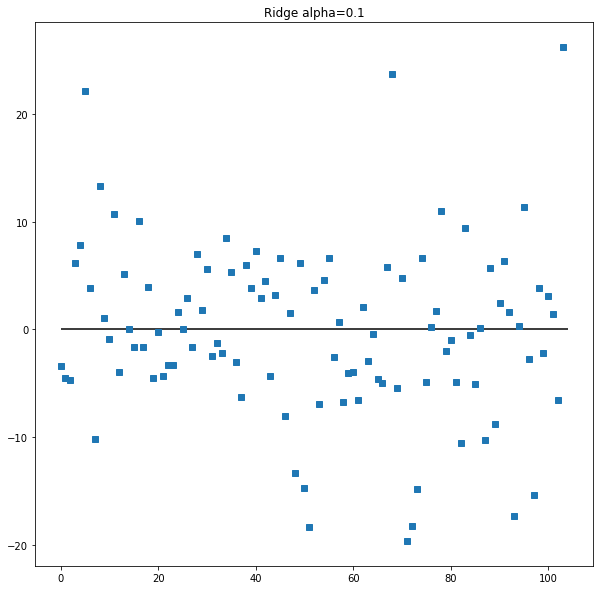

In [0]:
fig = plt.figure(figsize=(10,10))
plt.hlines(0,0, len(ridge01.coef_))
plt.plot(ridge01.coef_, 's', label="Ridge alpha=0.1")
plt.title('Ridge alpha=0.1')

Text(0.5, 1.0, 'Ridge alpha=0.01')

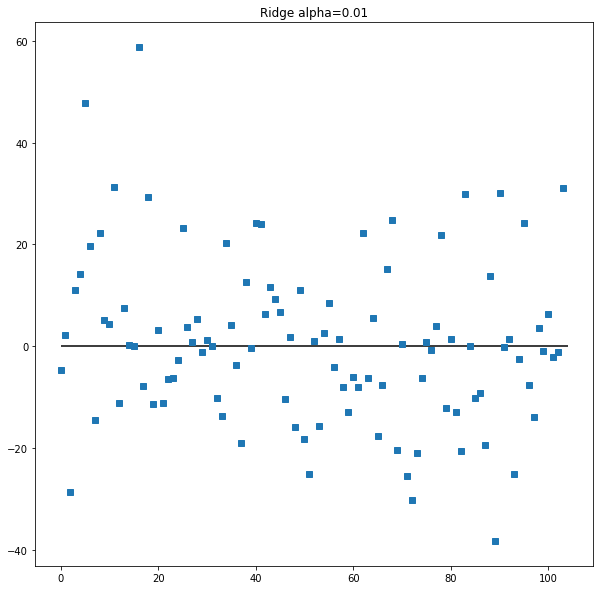

In [0]:
fig = plt.figure(figsize=(10,10))
plt.hlines(0,0, len(ridge001.coef_))
plt.plot(ridge001.coef_, 's', label="Ridge alpha=0.01")
plt.title('Ridge alpha=0.01')

In [0]:
### alpha값이 작아 질수록 규제가 적으므로 w범위가 점점 커진다.

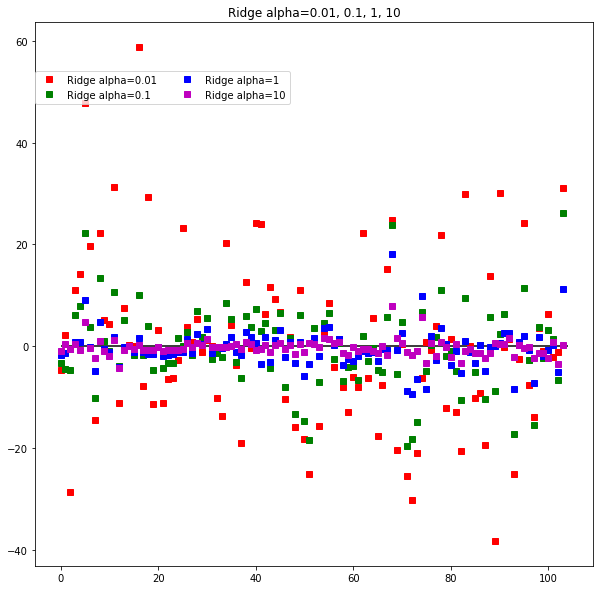

In [0]:
fig = plt.figure(figsize=(10,10))
plt.hlines(0,0, len(ridge001.coef_))
plt.plot(ridge001.coef_, 'rs', label="Ridge alpha=0.01")
plt.plot(ridge01.coef_, 'gs', label="Ridge alpha=0.1")
plt.plot(ridge1.coef_, 'bs', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 'ms', label="Ridge alpha=10")
plt.title('Ridge alpha=0.01, 0.1, 1, 10')

plt.legend(ncol=2,loc=(0,0.85))
plt.show()

In [0]:
###라쏘회귀를 해보자

from sklearn.linear_model import Lasso


#alpha=1
lasso1 = Lasso().fit(x_train, y_train)
print(lasso1)
print("훈련 세트 점수 : {:.2f}".format(lasso1.score(x_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso1.score(x_test, y_test)))

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
훈련 세트 점수 : 0.27
테스트 세트 점수 : 0.26


In [0]:
#alpha=10
lasso10 = Lasso(alpha=10).fit(x_train, y_train)
print(lasso10)
print("훈련 세트 점수 : {:.2f}".format(lasso10.score(x_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso10.score(x_test, y_test)))

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)
훈련 세트 점수 : 0.00
테스트 세트 점수 : -0.03


In [0]:
#alpha=0.1
lasso01 = Lasso(alpha=0.1).fit(x_train, y_train)
print(lasso01)
print("훈련 세트 점수 : {:.2f}".format(lasso01.score(x_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso01.score(x_test, y_test)))

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
훈련 세트 점수 : 0.75
테스트 세트 점수 : 0.70


In [0]:
#alpha=0.01
lasso001 = Lasso(alpha=0.01).fit(x_train, y_train)
print(lasso001)
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(x_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(x_test, y_test)))

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.80


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.8481333641448145, tolerance: 3.361037625329816
  positive)


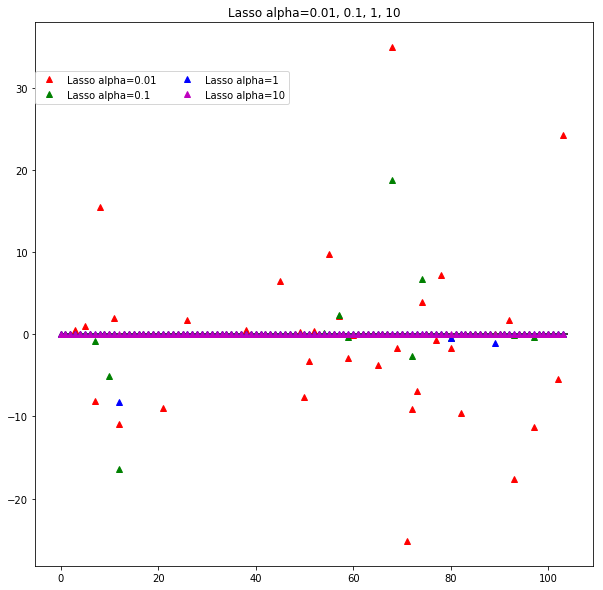

In [0]:
fig = plt.figure(figsize=(10,10))
plt.hlines(0,0, len(lasso001.coef_))
plt.plot(lasso001.coef_, 'r^', label="Lasso alpha=0.01")
plt.plot(lasso01.coef_, 'g^', label="Lasso alpha=0.1")
plt.plot(lasso1.coef_, 'b^', label="Lasso alpha=1")
plt.plot(lasso10.coef_, 'm^', label="Lasso alpha=10")
plt.title('Lasso alpha=0.01, 0.1, 1, 10')

plt.legend(ncol=2,loc=(0,0.85))
plt.show()

In [0]:
import pandas as pd

In [0]:
train=pd.read_csv("diabetes.csv")

In [0]:
print(train.info())
print(train.shape)
print(train.describe())
print(train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
(768, 9)
       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000

In [0]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [0]:
train["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [0]:
x=train.loc[:,'Pregnancies':"Age"]
y=train["Outcome"]

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
#make the model
model=DecisionTreeClassifier()

In [0]:
#learn the model
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
#predict the model
pred=model.predict(x_test)

In [0]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.7056277056277056


In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [0]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

NameError: ignored

In [0]:
## 성능 최적화

# 의사결정트리 모델
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)  #max_depth : 최대 내려가는 분류
# 학습
model =model.fit(x_train,y_train)
# 데이터 셋 예측
pred = model.predict(x_test)
# 정확도 확인
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.7705627705627706
